# TAREA 2 (23-24) RECORRIDO EN ABANICO (RECURSIVIDAD)
Aarón Medina Melián

Importamos las librerías necesarias

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import deque
import time 

1) Crear el MAZE como un numpy array de 10x10 relleno de ceros.

In [57]:
maze = np.zeros((10, 10))

2) Ponerle los bordes a 1

In [58]:
maze[0, :] = 1
maze[-1, :] = 1
maze[:, 0] = 1
maze[:, -1] = 1

2-1) Poner muros aleatorios

In [59]:
for _ in range(20):
    row = random.randint(1, 10 - 2)
    column = random.randint(1, 10 - 2)
    maze[row, column] = 1

maze[1, 1] = 2
maze[8, 8] = 3
maze

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 2., 1., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 3., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Puedes visualizarla llamando a la siguiente función (importando las librerías):

In [60]:
def visualize_example(maze):
    plt.figure()
    plt.imshow(maze)
    plt.title("Recorrido del laberinto")
    plt.inferno()
    plt.colorbar()
    plt.grid(False)
    plt.show()

4) Crear la matriz de movimiento MOVE (puede ser necesario trasponer la matriz para representar correctamente los movimientos en la pantalla).

In [61]:
move = np.array([
    [0, 1],
    [1, 0],
    [0, -1],
    [-1, 0]
])

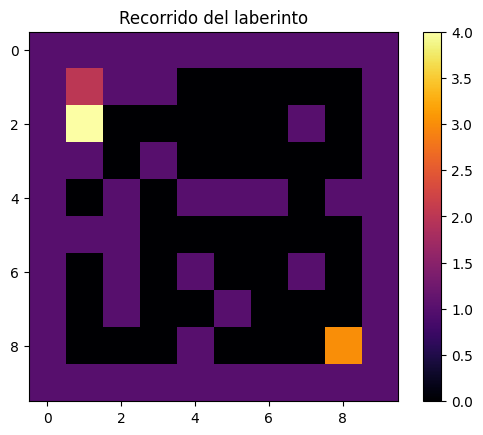

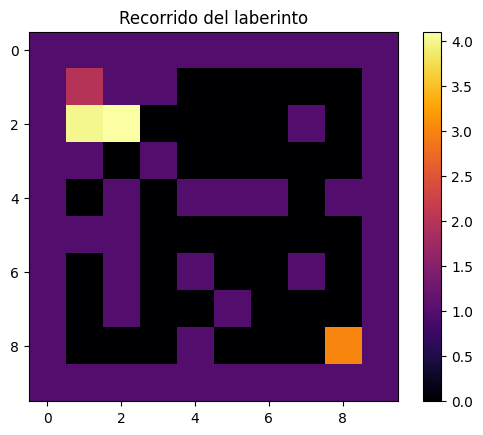

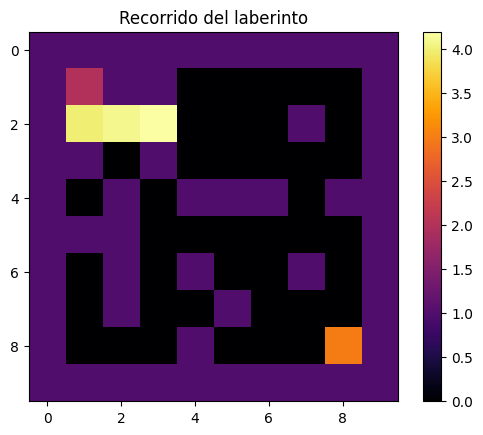

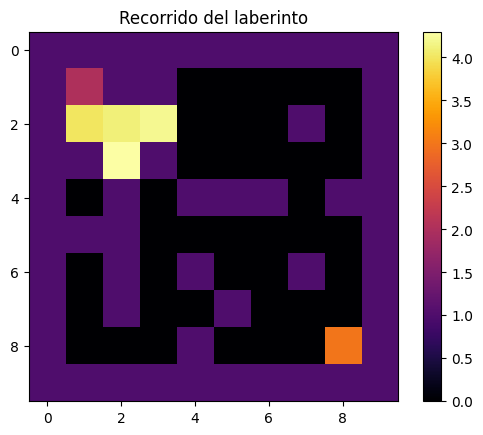

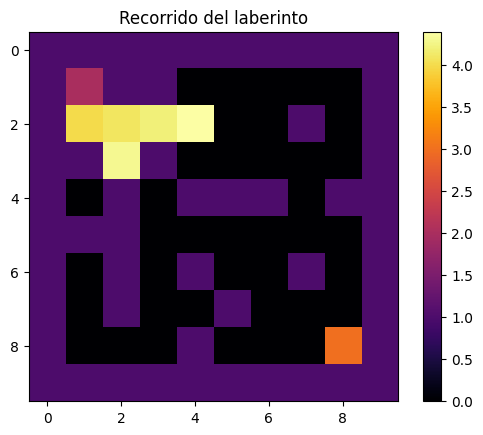

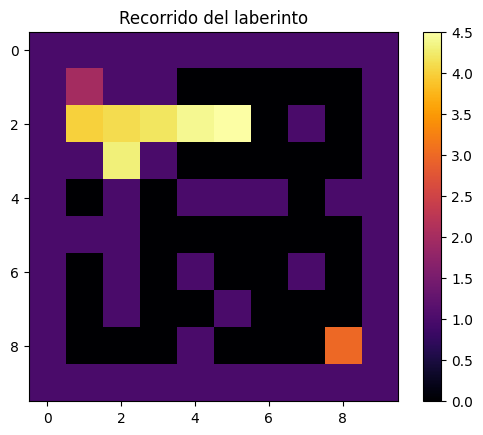

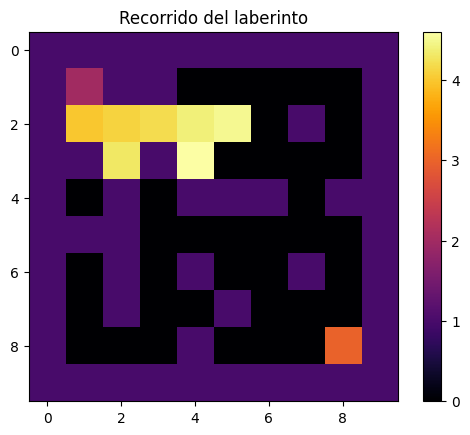

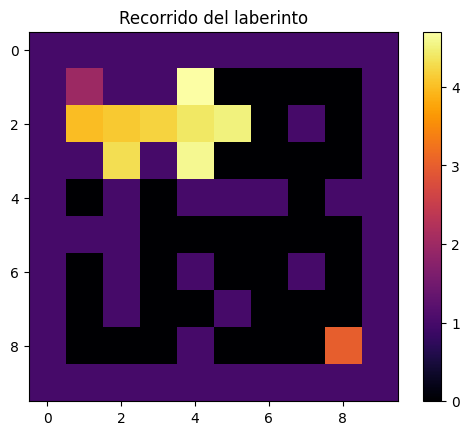

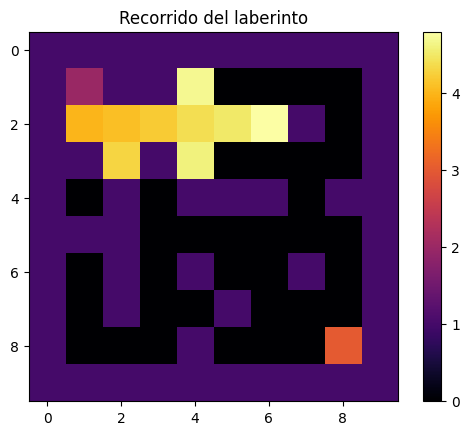

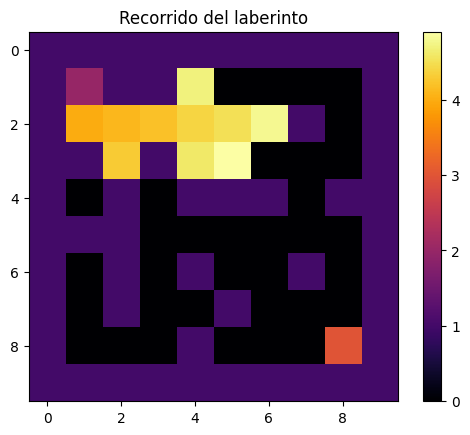

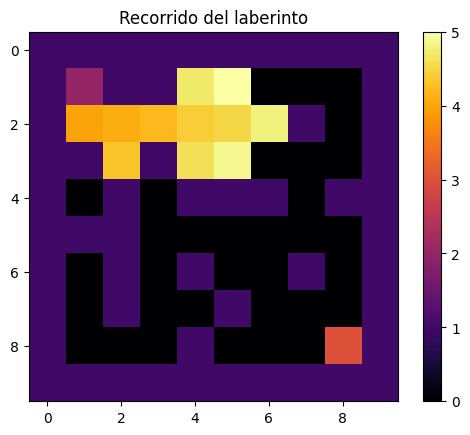

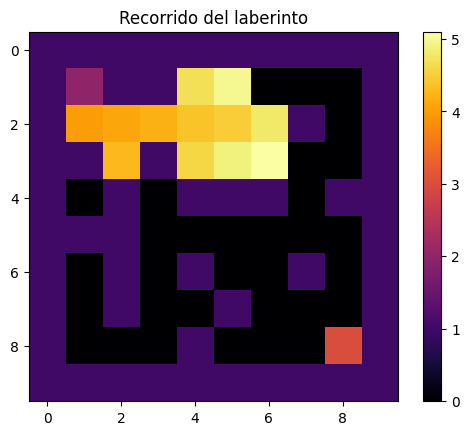

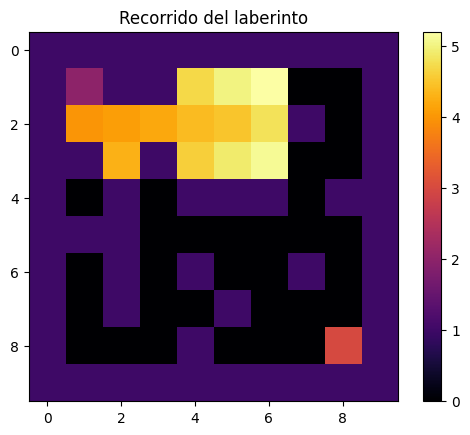

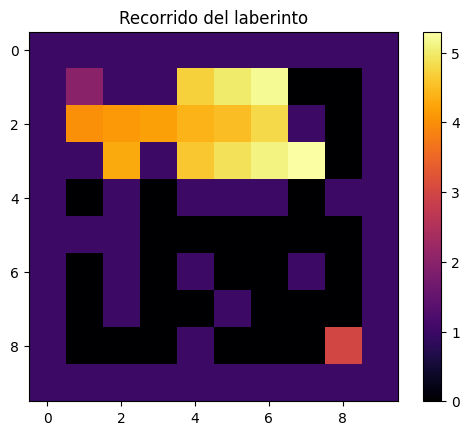

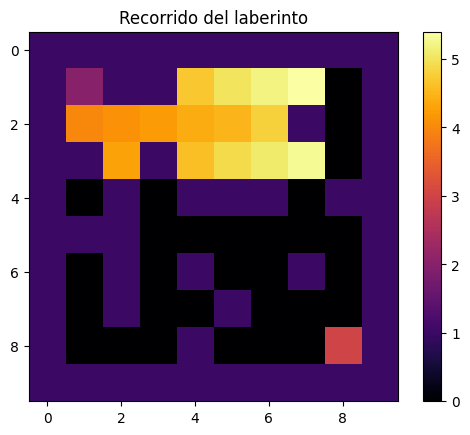

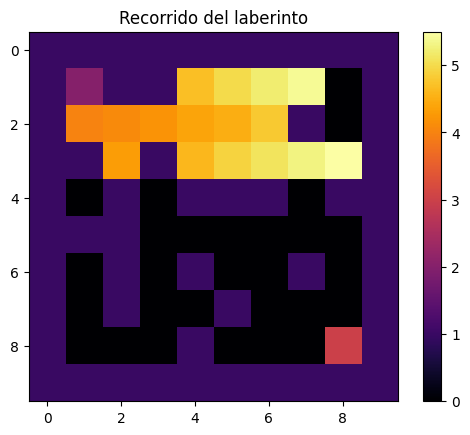

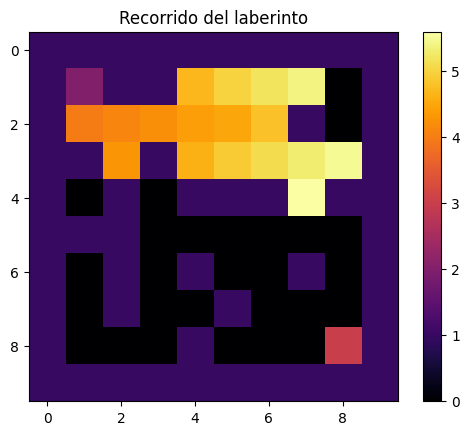

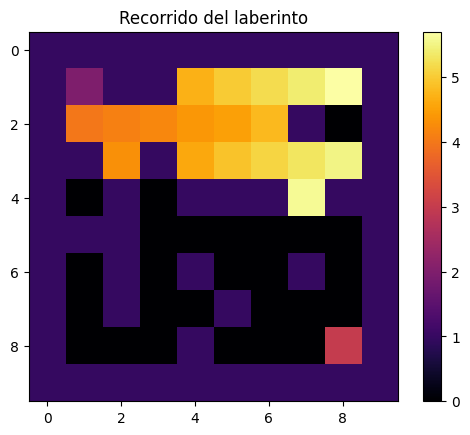

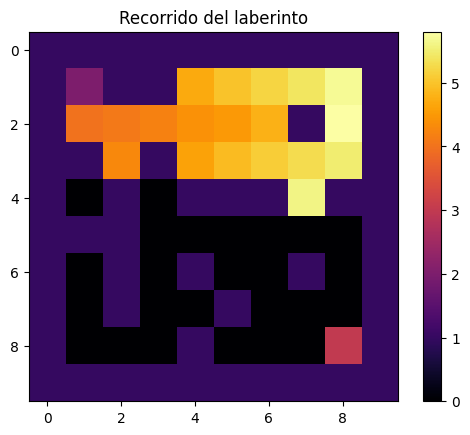

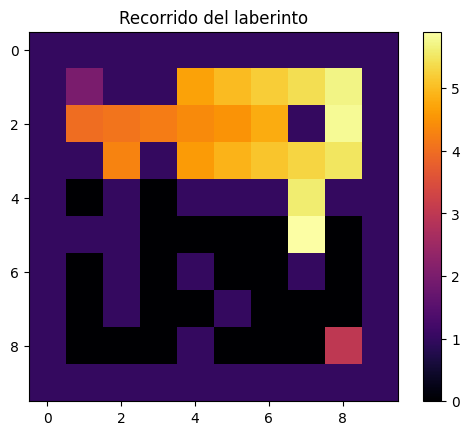

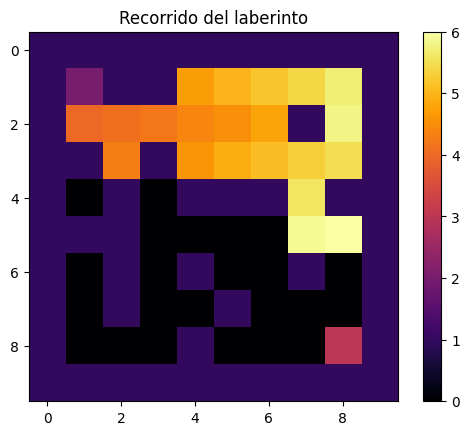

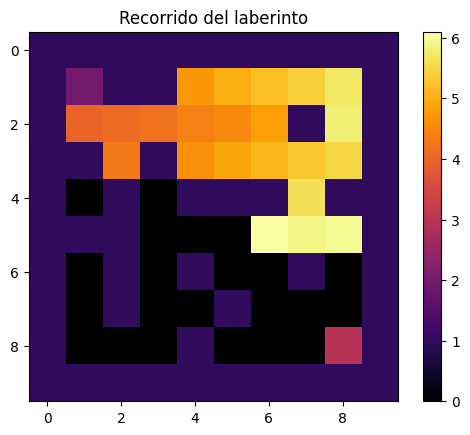

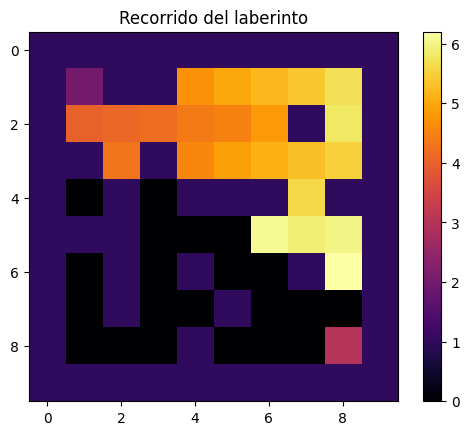

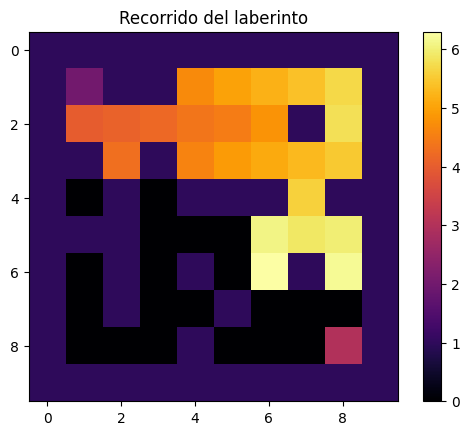

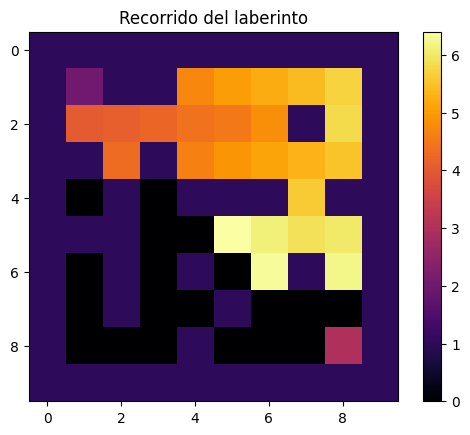

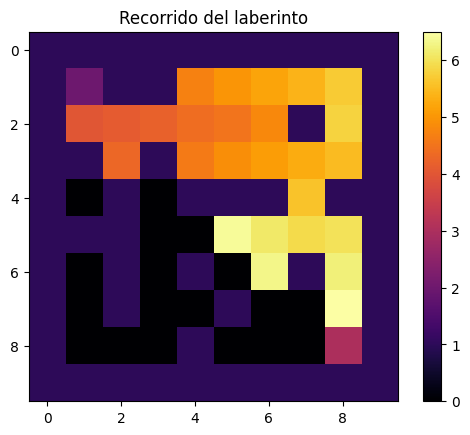

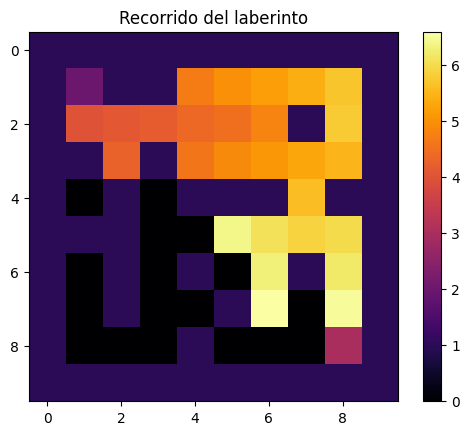

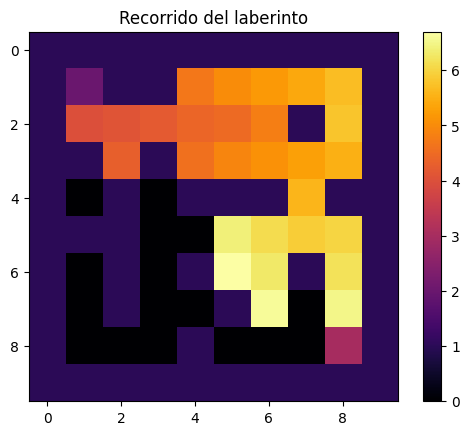

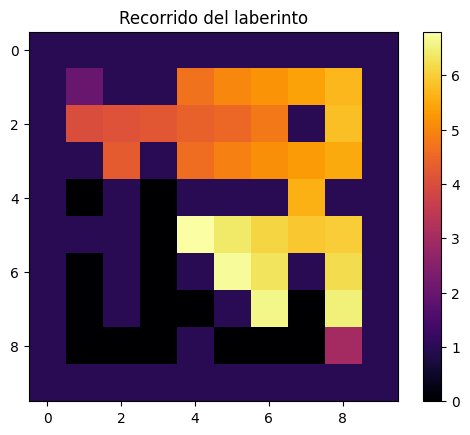

Encontré la salida


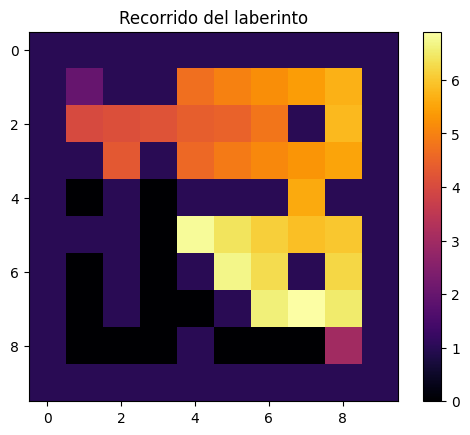

In [62]:
# Creamos la pila donde iremos añadiendo los caminos principales visitados
queue = deque([(1, 1)])

# Creamos una variable booleana Salida para saber cuando hemos encontrado la salida o no
salida = False

# Definimos una variable para ir cambiando los caminos ya visitados
position_count = 4

# Mientras existan lugares en la pila, seguimos recorriendo
while queue:
    
    # Obtenemos la posición que está a la izquierda en la pila que será nuestra posición actual 
    current_position = queue.popleft()

    # Recorremos la matriz de movimiento para realizar el reocrrido en abanico
    for x,y in move:
        new_x, new_y = current_position[0] + x, current_position[1] + y
        # Si es 0, significa que es un camino posible, no es un muro ni la salida
        if (maze[new_x, new_y] == 0):
            time.sleep(0.5)
            queue.append((new_x, new_y))
            maze[new_x, new_y] = position_count
            # La variable aumentará en 0.1 para que no se vean muchos cambios de colores al mostrar los caminos
            position_count += 0.1
            visualize_example(maze)

        # Si es 3, significa que es la salida, por lo tanto, ponemos la variable Salida a true    
        if (maze[current_position[0] + x, current_position[1] + y] == 3):
            print("Encontré la salida")
            salida = True
            
    if salida:
        break
    
if not salida:
    print("No hay salida")

        

Visualizar el mapa final con todos los caminos recorridos

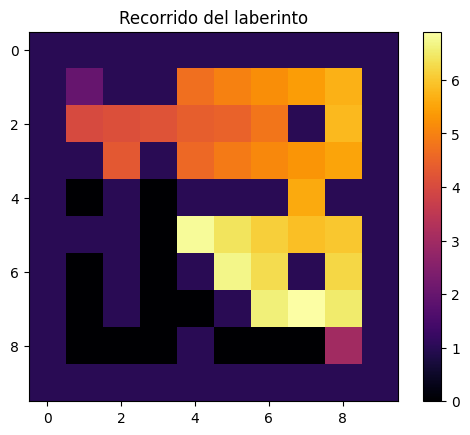

[[1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  2.  1.  1.  4.7 5.  5.2 5.4 5.7 1. ]
 [1.  4.  4.1 4.2 4.4 4.5 4.8 1.  5.8 1. ]
 [1.  1.  4.3 1.  4.6 4.9 5.1 5.3 5.5 1. ]
 [1.  0.  1.  0.  1.  1.  1.  5.6 1.  1. ]
 [1.  1.  1.  0.  6.8 6.4 6.1 5.9 6.  1. ]
 [1.  0.  1.  0.  1.  6.7 6.3 1.  6.2 1. ]
 [1.  0.  1.  0.  0.  1.  6.6 6.9 6.5 1. ]
 [1.  0.  0.  0.  1.  0.  0.  0.  3.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]


In [63]:
visualize_example(maze)
print(maze)